In [18]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.8
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

C:\Users\my pc\miniconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\client\session.py:1752: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [20]:
class mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('accuracy')>0.97):
            print("Accuracy reached 97%")
            self.model.Stop_training = True

In [21]:
callbacks = mycallback()

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

model.compile(optimizer = RMSprop(lr = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [22]:
train_gen = ImageDataGenerator(
            rescale = 1./255,
            rotation_range = 0.2,
            width_shift_range = 0.2,
            height_shift_range = 0.2,
            shear_range = 0.2,
            zoom_range = 0.2,
            horizontal_flip = True,
            fill_mode = 'nearest')

test_gen = ImageDataGenerator(rescale = 1./255)

train_data = train_gen.flow_from_directory('Training', target_size = (150,150), batch_size = 1, class_mode = 'categorical')

test_data = test_gen.flow_from_directory('Test', target_size = (150,150), batch_size = 1, class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [23]:
history = model.fit(train_data, steps_per_epoch = 10, epochs = 20, validation_data = test_data, validation_steps = 8, callbacks=[callbacks])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 10 steps, validate for 8 steps
Epoch 1/20
10/10 [==============================] - 1s 69ms/step - loss: 1.7135 - accuracy: 0.4000 - val_loss: 1.0451 - val_accuracy: 0.6250
Epoch 2/20
10/10 [==============================] - 0s 19ms/step - loss: 1.2172 - accuracy: 0.4000 - val_loss: 2.2864 - val_accuracy: 0.1250
Epoch 3/20
10/10 [==============================] - 0s 12ms/step - loss: 1.3079 - accuracy: 0.5000 - val_loss: 1.0275 - val_accuracy: 0.6250
Epoch 4/20
10/10 [==============================] - 0s 13ms/step - loss: 0.9727 - accuracy: 0.7000 - val_loss: 1.6812 - val_accuracy: 0.2500
Epoch 5/20
10/10 [==============================] - 0s 12ms/step - loss: 1.2278 - accuracy: 0.4000 - val_loss: 2.1557 - val_accuracy: 0.2500
Epoch 6/20
10/10 [==============================] - 0s 17ms/step - loss: 1.0797 - accuracy: 0.6000 - val_loss: 1.5267 - val_accuracy: 0.1250
Epoch 7/20
10/10 [==============================] - 0s 12ms/ste

<Figure size 432x288 with 0 Axes>

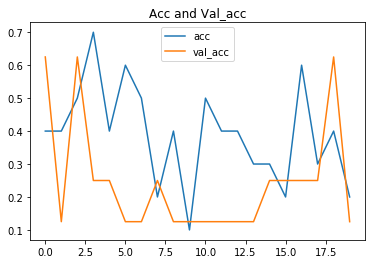

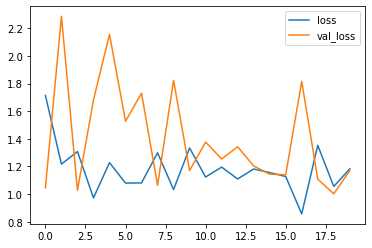

<Figure size 432x288 with 0 Axes>

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label = 'acc')
plt.plot(epochs, val_acc, label = 'val_acc')
plt.title('Acc and Val_acc')
plt.legend()
plt.figure()

plt.plot(epochs, loss, label = 'loss')
plt.plot(epochs,val_loss, label = 'val_loss')
plt.legend()
plt.figure()

In [25]:
import cv2
import os
dim = (150,150)
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_COLOR)
        if img is not None:
            img = cv2.resize(img,dim)
            images.append(img)
    return images
images = load_images_from_folder('Sample')
images = np.array(images)
print(images)

[[[[253 253 253]
   [253 253 253]
   [253 253 253]
   ...
   [252 252 252]
   [252 252 252]
   [252 252 252]]

  [[253 253 253]
   [253 253 253]
   [253 253 253]
   ...
   [253 253 253]
   [252 252 252]
   [253 253 253]]

  [[254 254 254]
   [253 253 253]
   [252 252 252]
   ...
   [253 253 253]
   [252 252 252]
   [253 253 253]]

  ...

  [[253 253 253]
   [252 252 252]
   [251 251 251]
   ...
   [252 252 252]
   [252 252 252]
   [250 250 250]]

  [[253 253 253]
   [252 252 252]
   [252 252 252]
   ...
   [252 252 252]
   [251 251 251]
   [250 250 250]]

  [[253 253 253]
   [252 252 252]
   [253 253 253]
   ...
   [251 251 251]
   [251 251 251]
   [252 252 252]]]


 [[[253 253 253]
   [253 253 253]
   [253 253 253]
   ...
   [252 252 252]
   [252 252 252]
   [252 252 252]]

  [[253 253 253]
   [253 253 253]
   [253 253 253]
   ...
   [252 252 252]
   [252 252 252]
   [252 252 252]]

  [[253 253 253]
   [253 253 253]
   [253 253 253]
   ...
   [252 252 252]
   [252 252 252]
   [252 252

In [26]:
classes = model.predict(images)

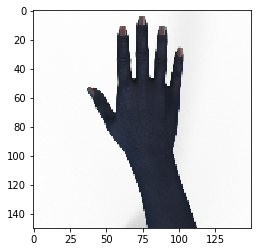

(1, 150, 150, 3)
[[0. 0. 1.]]


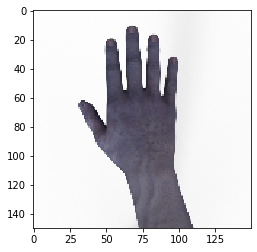

(1, 150, 150, 3)
[[0. 0. 1.]]


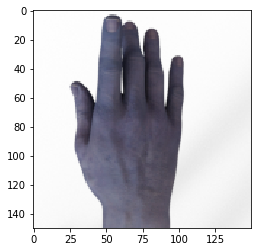

(1, 150, 150, 3)
[[0. 0. 1.]]


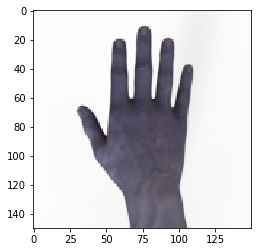

(1, 150, 150, 3)
[[0. 0. 1.]]


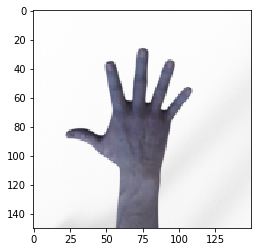

(1, 150, 150, 3)
[[0. 0. 1.]]


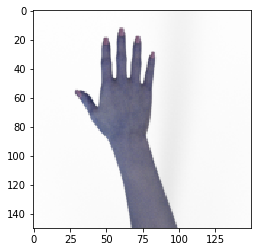

(1, 150, 150, 3)
[[0. 0. 1.]]


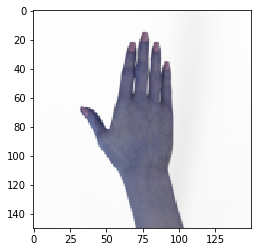

(1, 150, 150, 3)
[[0. 0. 1.]]


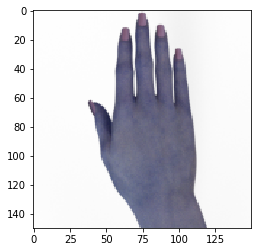

(1, 150, 150, 3)
[[0. 0. 1.]]


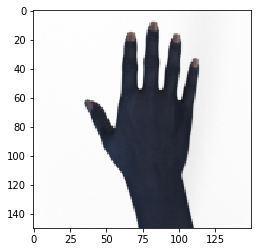

(1, 150, 150, 3)
[[0. 0. 1.]]


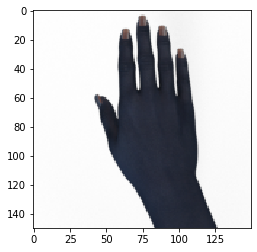

(1, 150, 150, 3)
[[0. 0. 1.]]


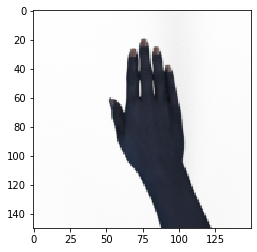

(1, 150, 150, 3)
[[0. 0. 1.]]


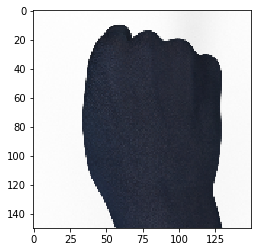

(1, 150, 150, 3)
[[0. 0. 1.]]


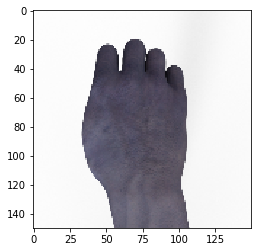

(1, 150, 150, 3)
[[0. 0. 1.]]


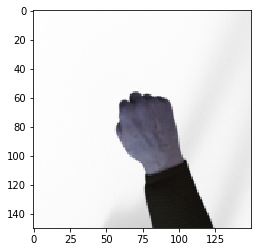

(1, 150, 150, 3)
[[0. 0. 1.]]


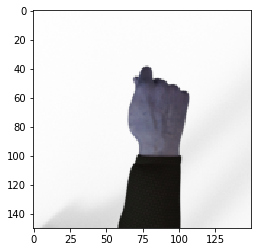

(1, 150, 150, 3)
[[0. 0. 1.]]


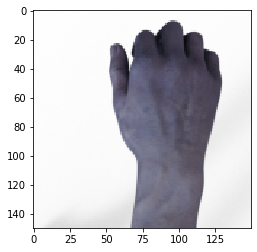

(1, 150, 150, 3)
[[0. 0. 1.]]


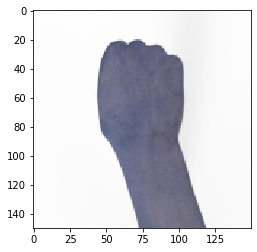

(1, 150, 150, 3)
[[0. 0. 1.]]


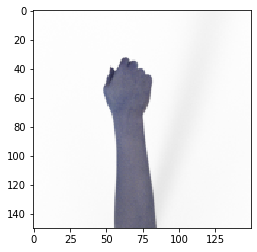

(1, 150, 150, 3)
[[0. 0. 1.]]


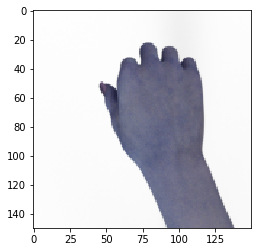

(1, 150, 150, 3)
[[0. 0. 1.]]


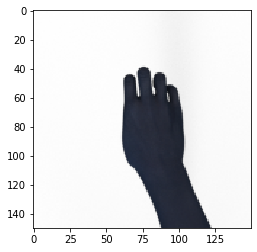

(1, 150, 150, 3)
[[0. 0. 1.]]


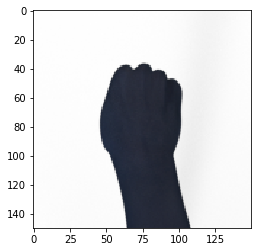

(1, 150, 150, 3)
[[0. 0. 1.]]


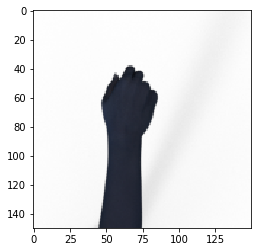

(1, 150, 150, 3)
[[0. 0. 1.]]


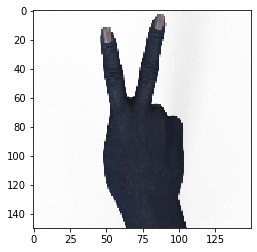

(1, 150, 150, 3)
[[0. 0. 1.]]


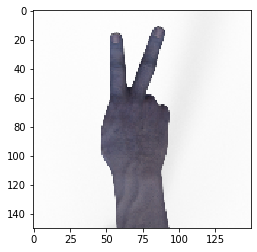

(1, 150, 150, 3)
[[0. 0. 1.]]


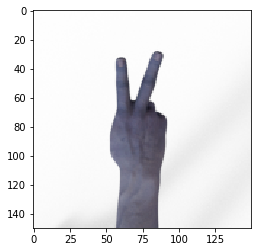

(1, 150, 150, 3)
[[0. 0. 1.]]


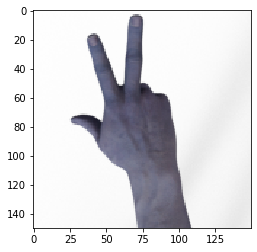

(1, 150, 150, 3)
[[0. 0. 1.]]


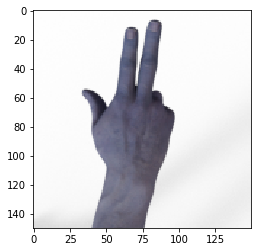

(1, 150, 150, 3)
[[0. 0. 1.]]


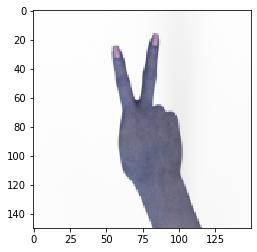

(1, 150, 150, 3)
[[0. 0. 1.]]


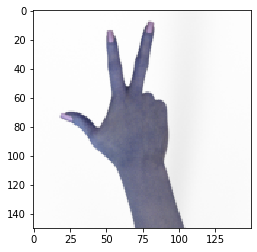

(1, 150, 150, 3)
[[0. 0. 1.]]


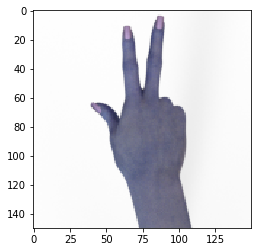

(1, 150, 150, 3)
[[0. 0. 1.]]


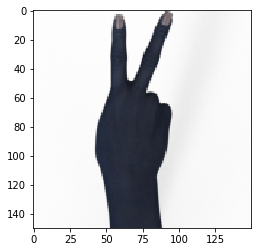

(1, 150, 150, 3)
[[0. 0. 1.]]


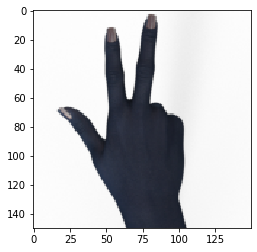

(1, 150, 150, 3)
[[0. 0. 1.]]


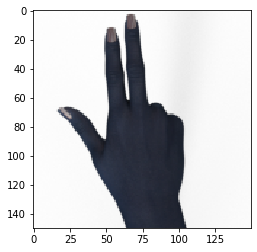

(1, 150, 150, 3)
[[0. 0. 1.]]


In [27]:
import matplotlib.pyplot as plt
for image in images:
    x = image
    image = np.array([image])
    pred = model.predict(image)
    plt.imshow(x)
    plt.show()
    #print(pred)
    print(image.shape)
    print(np.round(pred))     #Paper, Rock, Scissor